# Coordinate Transformation

</style> 

<div class="alert alert-info"> <strong> NAME: </strong> [ write your surname.name between the brackets (like that surname.name) ] </div>

One of the fundemental  concepts in photogrammetry is the **Collinearity condition**. 
<img style="float:left;" src="./img/NYW-CentralProjection02.png" width= 45% />
<!--![NYW-CentralProjection02.png](attachment:74694c0e-019d-4ed7-b6b1-01db6e7f67e9.png)-->

<!-- ![single.png >](attachment:single.png)-->

The condition applies to all frame cameras and states that an exposure station of any photograph (the perspective centre $C$), an object point ($P$, $Q$ or $R$), and its representation, in the photo ($P^{'}$, $Q^{'}$ or $R^{'}$), all lie on a straight line.  <br /> <br />The condition is a product of the **Central projection** that describes the mathematical model used to relate 3D object points in the world to 2D image points captured by a camera. **_This model is vital for understanding how a camera records the 3D environment onto a 2D image_** ($S$), forming the basis of photogrammetric calculations. In central projection, also known as perspective or pinhole projection, the camera is modeled as an ideal pinhole or point through which light passes to form an image on the imaging plane (usually the camera sensor).  <br /> <br /> The basic idea is that light rays from a 3D point in the scene pass through the camera's optical center (pinhole) and project onto the imaging plane to form a 2D point.

The **_Collinearity equation is a mathematical representation of Central projection_**, allowing the conversion between object coordinates ($X$, $Y$, $Z$) and image coordinates ($x$, $y$). It's a set of equations that relates the 3D object coordinates to the 2D image coordinates using the camera parameters and geometry.  

<img style="float:right;" src="./img/sensors001.png" width= 50% /> 

The collinearity  equations are typically expresed as a vector:  

\begin{align}
\begin{bmatrix} x \\\ y \\\ -c \end{bmatrix} = kR\begin{bmatrix} X - X_{c} \\\ Y - Y_{c} \\\ Z - Z_{c} \end{bmatrix} 
\end{align}

where:
- $x$, $y$ are the image coordinates.
- $-c$ is the principle distance (approximated by the focal length)
- $X$, $Y$, and $Z$ are the object coordinates.
- $X_{c}$, $Y_{c}$, and $Z_{c}$ are the perspective centre coordinates.

If we account for the offset from the principle point ($x_{0}$,  $y_{0}$) and represent the pose of the camera (phi. kappa and omega) at the instant the image was captured through the rotation matrix $R$: 

\begin{align} 
\begin{bmatrix} x - x_{0} \\\ y - y_{0} \\\ -c \end{bmatrix} = k \begin{bmatrix} r_{11} & r_{12} & r_{13} \\\ r_{21} & r_{22} & r_{23} \\\ r_{31} & r_{32} & r_{33} \end{bmatrix} \begin{bmatrix} X - X_{c} \\\ Y - Y_{c} \\\ Z - Z_{c} \end{bmatrix}
\end{align} 

The scaling factor $k$ can be eliminated with some math; and the result will be the classic form of the **Collinearity equation** typically given as:

<!-- <center><img src="./img/ColEqn.png" align="center" width="500" /><center> -->

$$x - x_{0} = -c \cdot \frac{{R_{11}(X - X_{0}) + R_{21}(Y - Y_{0}) + R_{31}(Z - Z_{0})}}{{R_{13}(X - X_{0}) + R_{23}(Y - Y_{0}) + R_{33}(Z - Z_{0})}} $$  
   
$$y - y_{0} = -c \cdot \frac{{R_{12}(X - X_{0}) + R_{22}(Y - Y_{0}) + R_{32}(Z - Z_{0})}}{{R_{13}(X - X_{0}) + R_{23}(Y - Y_{0}) + R_{33}(Z - Z_{0})}} $$
 
The Collinearity equations essentially describe the projection of a 3D point ($X$, $Y$, $Z$) in the scene onto a 2D point ($x$, $y$) in the image plane. The equations are essential for photogrammetric computations, such as bundle adjustment, where the camera parameters and 3D scene points are estimated to achieve optimal alignment between observed image points and the corresponding 3D points.

**Central projection and the Collinearity equations** are crucial in photogrammetry for various applications like 3D reconstruction, mapping, and computer vision tasks.
____

<div class="alert alert-block alert-success"> <strong> For this exercise we will simply transform coordinates from an object space to an image plane with the Collinearity equations. </strong>  
    
We will take a 3D point and transform it to a 2D plane.
<br><!--<br>-->

A secondary focus is an opportunity to become familiar with the Python programming language and to experiment with changing functions, variables and parameters and to understand how these affect the result.
</div>

<div class="alert alert-danger">
  <strong>REQUIRED!</strong> 
  
You are required to insert your outputs and any comment into this document. The document you submit should therefore contain the existing text in addition to:

 - Plots and other outputs from executing the code chunks
 - Discussion of your plots and other outputs as well as conclusions reached.
 - This should also include any hypotheses and assumptions made as well as factors that may affect your conclusions.
</div>

In [1]:
#- load the magic
import math
from math import cos, sin

import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-warning"><b>QUESTION! </b>  </div>

- **Give one practical example where we would _need to do the opposite_ of what we are about to do here. That is; determine a 3D coordinate from a 2D image**

{ click in this cell and write your answer here }

**Given parameters**

In [2]:
# focal Length (mm)
f = 8.865

#- pixel size
Pixel_size = 0.00241

# Principle Point pixel coords (pix) in sensor coordinate frame
u0 = 2736 #2004.984
v0 = 1824 #1448.630

# Perspective Center (meter) of DJI_0125
XL = 265541.413100000005215		
YL = 6240024.606700000353158
ZL = 140.459900000000005

# omega phi kappa (in degree) of DJI_0125
omega = math.radians(-10.190)
phi = math.radians(-0.002)
kappa = math.radians(-173.958)

# Ground coordinates of GCP 9
X = 265516.276 
Y = 6239996.187
Z = 87.62

**Rotation matrix**

In [3]:
M = np.array([[cos(phi) * cos(kappa),
               cos(omega) * sin(kappa) + sin(omega) * sin(phi) * cos(kappa),
               sin(omega) * sin(kappa) - cos(omega) * sin(phi) * cos(kappa)],

              [-cos(phi) * sin(kappa),
               cos(omega) * cos(kappa) - sin(omega) * sin(phi) * sin(kappa),
               sin(omega) * cos(kappa) + cos(omega) * sin(phi) * sin(kappa)],

              [sin(phi),
               -sin(omega) * cos(phi),
               cos(omega) * cos(phi)]])
print(M)

[[-9.94445004e-01 -1.03603320e-01  1.85872436e-02]
 [ 1.05257458e-01 -9.78758477e-01  1.75933829e-01]
 [-3.49065850e-05  1.76912963e-01  9.84226499e-01]]


**Calculate the image coordinates** with the **Collinearity equations**

In [4]:
delta_x =  - f * (M[0, 0] * (X - XL) + M[0, 1] * (Y - YL) + M[0, 2] * (Z - ZL)) / (
        M[2, 0] * (X - XL) + M[2, 1] * (Y - YL) + M[2, 2] * (Z - ZL))

delta_y =  - f * (M[1, 0] * (X - XL) + M[1, 1] * (Y - YL) + M[1, 2] * (Z - ZL)) / (
        M[2, 0] * (X - XL) + M[2, 1] * (Y - YL) + M[2, 2] * (Z - ZL))

**Convert** delta_x **and** delta_y **image coordinates to pixel coordinates**

In [6]:
#Pixel_size= 0.00161797
delta_x_pix = delta_x/Pixel_size
delta_y_pix = delta_y/Pixel_size

u = u0 + delta_x_pix
v = v0 - delta_y_pix

# print x and y image coordinate in pixel
print('\nPixel Coordinates of GCP in pixel: \nu:', u, '\nv:', v) # 4459.724237012733283	-799.310765491625716 


Pixel Coordinates of GCP in pixel: 
u: 4474.791872702986 
v: 800.2017163171323


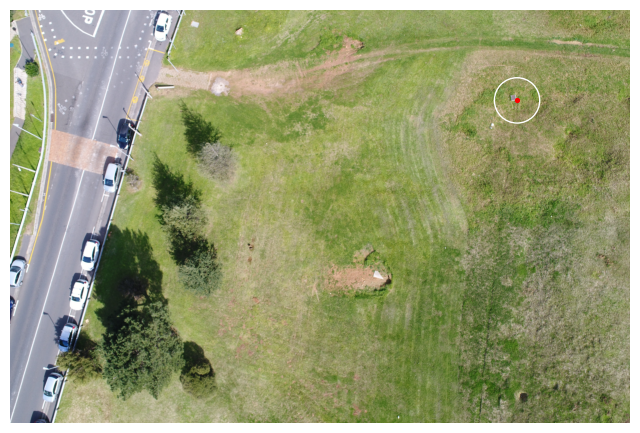

In [7]:
#- plot
img1= plt.imread('./data/trans/DJI_0125.JPG')

fig, ax = plt.subplots(1,figsize=(8, 8))

ax.imshow(img1)
ax.axis('off')
plt.scatter(u, v, s=30, marker='.',c='r')
circle = plt.Circle((u, v), 200, color='w',fill=0)
ax.add_patch(circle)
plt.show()

<div class="alert alert-block alert-warning"><b>Task! </b>  </div>

- **As you can see this GCP is on campus and part of the UCT Dam dataset. There are two other images along with the coordinate values of two more GCP in the `./data/trans/` folder.** _(read the `info.txt`)_
    
    **Choose another GCP, change the appropriate values in `Given parameters` and execute this notebook. Discuss the results. Your answer must be between 100 and 150 words.**

</style> 

<div class="alert alert-info"> <strong> HINT! </strong> Describe what the collinearity equation is doing.

</div>

{ click in this cell and write your answer here }

_images:_
    
- **The three points P, Q and R are projected on the plane S through the projection centre C**: By Nijdam - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=18300851    
- **World coordinate system and perspective projection camera coordinate system**: Kim, N.; Baek, S.; Kim, G. Absolute IOP/EOP Estimation Models without Initial Information of Various Smart City Sensors. Sensors 2023, 23, 742. https://doi.org/10.3390/s23020742